# 4. Descargando de una pagina web

In [1]:
import requests 

In [2]:
url='https://www.pagina12.com.ar/' 

In [3]:
p12=requests.get(url)
# type(p12) -> requests.models.Response

In [4]:
p12.status_code

200

In [5]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta proper

In [6]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 

In [7]:
p12.headers

{'Date': 'Thu, 08 Jul 2021 22:47:13 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"65ea9-2lCHUHFtKizB5yv4cvNVZM4nC3k"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.694', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-zcrg9', 'x-restarts': '0', 'X-Cache': 'HIT (4)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '66bcda60daff36e8-LIM', 'Content-Encoding': 'gzip'}

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
p12.request.method

'GET'

In [10]:
p12.request.url

'https://www.pagina12.com.ar/'

# 5. parseando HTML con BeautifulSoup

In [11]:
from  bs4 import BeautifulSoup

In [12]:
s=BeautifulSoup(p12.text,'lxml') #lxml: parser-funcion q separa el texto en pedazos. p12 es un objeto tipo request

In [13]:
type(s)

bs4.BeautifulSoup

In [14]:
print(s.prettify()) #da una impresion de como esta estructurado el html (lo mismo cuando abrimos el codigo de la pagina con f12)

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

In [15]:
secciones=s.find('ul',attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li') #encontrar 
#el primer ul(ul es la seccion del html q estamos buscando), con los atributos de clase que tambien estan en 
#el html
secciones #ul es el tag que contiene todas las secciones
# type(secciones) -> bs4.element.ResultSet

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/psicologia">Psicología</a></li>]

# 6. extrayendo la informacion

In [16]:
seccion=secciones[0]
print(seccion)

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>


In [17]:
seccion.find('a').get('href') #de seccion, encontrar el primer a y devolver href

'https://www.pagina12.com.ar/secciones/el-pais'

In [18]:
seccion.a.get_text() #a. es lo mismo que find('a'), get_text es obtener el texto de cada seccion

'El país'

In [19]:
links_secciones=[seccion.find('a').get('href') for seccion in secciones]
links_secciones
#en todas las secciones (array) definir seccion como seccion.a.get(href)

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/psicologia']

In [20]:
sec=requests.get(links_secciones[0]) #hacer una request a links_secciones[0]
sec.status_code #tiene que salir 200 si todo esta ok

200

In [21]:
s_seccion=BeautifulSoup(sec.text,'lxml') #transforar a beautiful soup la sub pagina a explotar
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo

In [22]:
featured_article=s_seccion.find_all('div',attrs={'class':'article-item__header deco-bar-here-bottom is-mobile-left'})
featured_article
#featured_article=s_seccion.find('div',attrs={'class':'article-item__content'})
#featured_article #obtener los containers de cada una de laas notas 
#type(featured_article)  ->   bs4.element.Tag

[<div class="article-item__header deco-bar-here-bottom is-mobile-left"><a href="/353515-caba-las-medidas-que-rigen-a-partir-de-este-viernes-una-por-"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt=" (Fuente: NA)" class="" height="313" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-07/176469-bares_0.jpeg?itok=9Ms1eYkt" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-07/176469-bares_0.jpeg?itok=9Ms1eYkt 470w, https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2021-07/176469-bares_0.jpeg?itok=uXCuc3dq 300w, https://images.pagina12.com.ar/styles/focal_3_2_120x80/public/2021-07/176469-bares_0.jpeg?itok=_p7Lu8CX 120w" width="470"></amp-img></a></div>,
 <div class="article-item__header deco-bar-here-bottom is-mobile-left"><a href="/353490-asociacion-estrategica-con-la-region-y-el-lugar-de-la-argent"><!-- DUST PATH: /usr/src/app/node_modules/front

In [23]:
len(featured_article)

2

In [24]:
featured_article[0].find('a').get('href')#para comprobar el container de una pagina dentro de article-list

'/353515-caba-las-medidas-que-rigen-a-partir-de-este-viernes-una-por-'

In [25]:
article_list=s_seccion.find_all('div',attrs={'class':'article-item__header'})
article_list
len(article_list)
#type(article_list) -> bs4.element.ResultSet

11

In [26]:
article_list[0].find('a').get('href') #para encontrar el string del link

'/353530-protesta-de-organizaciones-sociales'

In [27]:
def obtener_urls(soup):
    '''
    funcion que devuelve las url de las secciones 
    '''
    lista_notas=[]
            
    for article in soup.find_all('div',attrs={'class':'article-item__header'}):
        lista_notas.append(url[:-1]+article.find('a').get('href'))
    return lista_notas

In [28]:
lista_notas=obtener_urls(s_seccion)
lista_notas

['https://www.pagina12.com.ar/353530-protesta-de-organizaciones-sociales',
 'https://www.pagina12.com.ar/353515-caba-las-medidas-que-rigen-a-partir-de-este-viernes-una-por-',
 'https://www.pagina12.com.ar/353490-asociacion-estrategica-con-la-region-y-el-lugar-de-la-argent',
 'https://www.pagina12.com.ar/353484-horacio-rodriguez-larreta-vamos-a-dar-nuevos-pasos',
 'https://www.pagina12.com.ar/353483-dos-mil-dias-con-milagro-sala-detenida-organizaciones-politi',
 'https://www.pagina12.com.ar/353469-la-anecdota-de-lucia-topolansky-sobre-un-curioso-comentario-',
 'https://www.pagina12.com.ar/353450-el-chiste-que-jair-bolsonaro-le-hizo-a-alberto-fernandez-al-',
 'https://www.pagina12.com.ar/353446-interna-en-juntos-por-el-cambio-gerardo-morales-apunto-contr',
 'https://www.pagina12.com.ar/353445-el-inadi-sostuvo-que-alberto-fernandez-no-discrimino-en-sus-',
 'https://www.pagina12.com.ar/353434-se-reactiva-la-investigacion-contra-carlos-blaquier-por-deli',
 'https://www.pagina12.com.ar/35342

# 7. manejo de errores

In [29]:
r=requests.get(url)

In [30]:
r.status_code
    #procesamos la respuesta
#else
#inforamamos el error

200

In [31]:
if r.status_code == 200:
    print('#procesamos respuesta')
else:
    print('#informamos error')

#procesamos respuesta


In [32]:
url_mala=url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [33]:
try:
    requests.get(url_mala)
except Exception as e:
    print('error en la request')
    print(e)
    print('\n')

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f4de1388e50>: Failed to establish a new connection: [Errno -2] Name or service not known'))




# 8. descargando contenido

In [34]:
url_nota=lista_notas[0]
url_nota

'https://www.pagina12.com.ar/353530-protesta-de-organizaciones-sociales'

In [35]:
try:
    
    # descargar la url con request
    nota=requests.get(url_nota)
    
    if nota.status_code == 200:
        
        #texto de requests a BeautifulSoup
        s_nota = BeautifulSoup(nota.text,'lxml')
        
        # Extraemos el titulo
        titulo = s_nota.find('h1')
        
        print(titulo.text)
        
        #extrae fecha del articulo
        fecha = s_nota.find('span',attrs={'class':'p12-separator--right--gray'}).get_text()
        
        print(fecha)
        
        #extraer la volanta
        volanta = s_nota.find('h4')
        
        print(volanta.get_text())
        
        #extraer copete
        copete = s_nota.find('h3')
        
        print(copete.text)
        
        #extraer autor
        autor = s_nota.find('div', attrs = {'class' : 'author-inner'}).get_text()
        
        print(autor)
        
        
        #extraer cuerpo de la nota
        #cuerpo = s_nota.find('div' , attrs = {'class' : 'article-main-content article-text'})
        
except Exception as e:
    
    print('Error:')
    
    print(e)
    
    print('\n')

Protesta de organizaciones sociales
08 de julio de 2021
Cortaron parte de la Avenida 9 de Julio




# 9 contenido multimedia

In [36]:
media = s_nota.find('div' , attrs = {'class' : 'article-main-media-image__container'})
media

<div class="article-main-media-image__container"><div class="image-wrapper"><figure><figure class="object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt=" (Fuente: NA)" class="lazyload" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-07/176495-1625762167210708019_0.jpg?itok=JhexqhsA" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8"/></figure><figcaption>. Imagen: NA</figcaption></figure></div></div>

In [37]:
imagenes = media.find_all('img')
imagenes

[<img alt=" (Fuente: NA)" class="lazyload" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-07/176495-1625762167210708019_0.jpg?itok=JhexqhsA" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8"/>]

In [38]:
img_src = imagenes[0].get('data-src')
img_src

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-07/176495-1625762167210708019_0.jpg?itok=JhexqhsA'

In [39]:
img_req = requests.get(img_src)

In [40]:
img_req.status_code

200

In [41]:
from IPython.display import Image

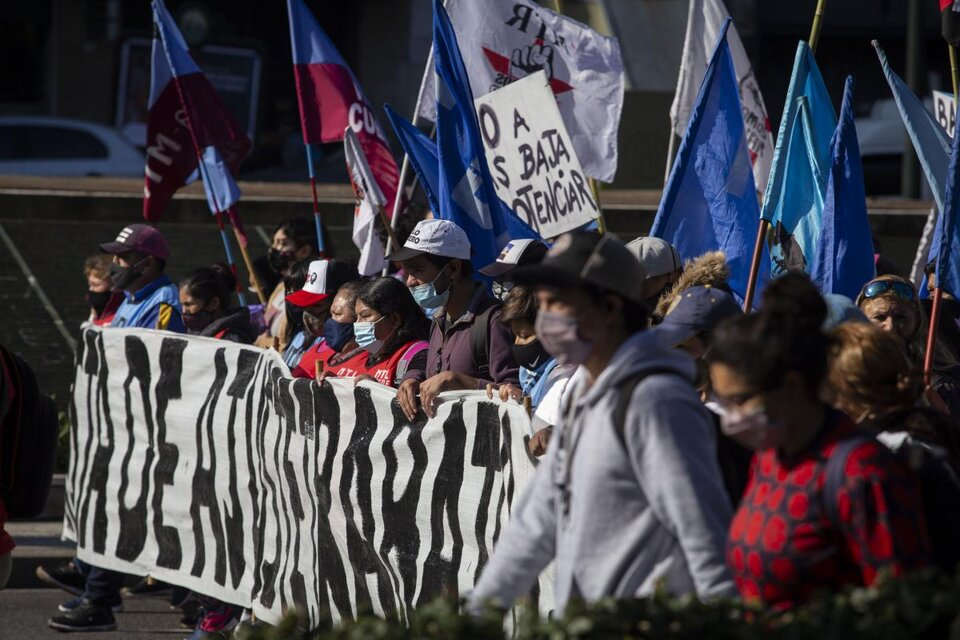

In [42]:
Image(img_req.content)

# 10 unificando el scraper

In [43]:
def obtener_info(s_nota):
    
    #crear un diccionario vacio 
    ret_dict = {}
    
    # extraer fecha
    fecha = s_nota.find('span',attrs={'class':'p12-separator--right--gray'})
    
    if fecha:
        
        ret_dict['fecha'] = fecha.get_text()
        
    else:
        
        ret_dict['fecha'] = None
        
    #extraer titulo
    titulo = s_nota.find('h1')
    
    if titulo:
        
        ret_dict['titulo'] = titulo.text
    
    else:
        
        ret_dict['titulo'] = None
        
    #extraer volanta
    volanta=s_nota.find('h4')
    
    if volanta:
        
        ret_dict['volanta'] = volanta.get_text()
        
    else:
        
        ret_dict['volanta'] = None
    
    #extraer copete
    copete = s_nota.find('h3')
    
    if copete:
        
        ret_dict['copete'] = copete.get_text()
        
    else:
        
        ret_dict['copete'] = None
        
    #extraer autor
    autor = s_nota.find('div', attrs = {'class' : 'author-inner'})
        
    if autor:
        
        ret_dict['autor'] = autor.get_text()
        
    else:
        
        ret_dict['autor'] = None
    
    #extraer imagen
    media = s_nota.find('div' , attrs = {'class' : 'article-main-media-image__container'})
    
    if media:
        
        imagenes = media.find_all('img')
        
        if len(imagenes) == 0:
            
            print('no se encontraron imagenes')
            
        else:
            
            imagen = imagenes[-1]
            
            img_src = imagen.get('data-src')
            
            try:
                
                img_req = requests.get(img_src)
                
                if img_req.status_code == 200:
                    
                    ret_dict['imagen'] = img_req.content
                    
                else:
                
                    ret_dict['imagen'] = None
                
            except:
                
                print('no existe imagen')
                
    else:
        
        print('no existe media')
        
    return ret_dict

In [44]:
obtener_info(s_nota)

{'fecha': '08 de julio de 2021',
 'titulo': 'Protesta de organizaciones sociales',
 'volanta': 'Cortaron parte de la Avenida 9 de Julio',
 'copete': '',
 'autor': '',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x17PExif\x00\x00II*\x00\x08\x00\x00\x00\t\x00\x0f\x01\x02\x00\x06\x00\x00\x00z\x00\x00\x00\x10\x01\x02\x00\r\x00\x00\x00\x80\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\x8e\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x96\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00*\x00\x00\x00\x9e\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc8\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xdc\x00\x00\x006\x03\x00\x00Canon\x00Canon EOS 6D\x00\x00,\x01\x00\x00\x01\x00\x00\x00,\x01\x00\x00\x01\x00\x00\x00Adobe Photoshop Camera Raw 11.3 (Windows)\x002021:07:08 13:11:27\x00!\x00\x9a\x82\x05\x00\x01\x00\x00\x00n\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00v\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00

In [45]:
def scrape_nota(url):
    
    try:
        
        nota = requests.get(url)
        
    except Exception as e:
    
        print('Error scrapeando URL:', url)
        
        print(e)
        
        return None
    
    if nota.status_code != 200:
        
        print(f'error obteniendo nota {url}')
        
        print(f'status code = {nota.status_code}')
        
        return None
    
    s_nota = BeautifulSoup(nota.text , 'lxml')
    
    ret_dict = obtener_info(s_nota)
    
    ret_dict[url] = url
    
    return ret_dict   
    

In [46]:
scrape_nota(url_nota)

{'fecha': '08 de julio de 2021',
 'titulo': 'Protesta de organizaciones sociales',
 'volanta': 'Cortaron parte de la Avenida 9 de Julio',
 'copete': '',
 'autor': '',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00\x84\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x006\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x03\x04\x05\x07\x01\x02\x08\x00\t\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x0

In [47]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/psicologia']

In [48]:
notas = []

for link in links_secciones:
    
    try:
        
        r = requests.get(link)
        
        if r.status_code == 200:
            
            soup = BeautifulSoup(r.text, 'lxml')
            
            notas.extend(obtener_urls(soup))
            
            #print(url_nota=url[:-1]+obtener_urls(soup))
        
        else:
            
            print('no se pudo obtener la seccion' , link)
            
    except:
        
        print('no se pudo obtener la seccion' , link)      


In [49]:
notas

['https://www.pagina12.com.ar/353530-protesta-de-organizaciones-sociales',
 'https://www.pagina12.com.ar/353515-caba-las-medidas-que-rigen-a-partir-de-este-viernes-una-por-',
 'https://www.pagina12.com.ar/353490-asociacion-estrategica-con-la-region-y-el-lugar-de-la-argent',
 'https://www.pagina12.com.ar/353484-horacio-rodriguez-larreta-vamos-a-dar-nuevos-pasos',
 'https://www.pagina12.com.ar/353483-dos-mil-dias-con-milagro-sala-detenida-organizaciones-politi',
 'https://www.pagina12.com.ar/353469-la-anecdota-de-lucia-topolansky-sobre-un-curioso-comentario-',
 'https://www.pagina12.com.ar/353450-el-chiste-que-jair-bolsonaro-le-hizo-a-alberto-fernandez-al-',
 'https://www.pagina12.com.ar/353446-interna-en-juntos-por-el-cambio-gerardo-morales-apunto-contr',
 'https://www.pagina12.com.ar/353445-el-inadi-sostuvo-que-alberto-fernandez-no-discrimino-en-sus-',
 'https://www.pagina12.com.ar/353434-se-reactiva-la-investigacion-contra-carlos-blaquier-por-deli',
 'https://www.pagina12.com.ar/35342

In [50]:
data  = []

for i,nota in enumerate(notas):
    
    print(f'scrapeando nota{i}/{len(notas)}')
    
    data.append(scrape_nota(nota))

scrapeando nota0/66
scrapeando nota1/66
scrapeando nota2/66
scrapeando nota3/66
scrapeando nota4/66
scrapeando nota5/66
scrapeando nota6/66
scrapeando nota7/66
scrapeando nota8/66
scrapeando nota9/66
scrapeando nota10/66
scrapeando nota11/66
scrapeando nota12/66
scrapeando nota13/66
scrapeando nota14/66
scrapeando nota15/66
scrapeando nota16/66
scrapeando nota17/66
scrapeando nota18/66
scrapeando nota19/66
scrapeando nota20/66
scrapeando nota21/66
scrapeando nota22/66
scrapeando nota23/66
scrapeando nota24/66
scrapeando nota25/66
scrapeando nota26/66
scrapeando nota27/66
scrapeando nota28/66
scrapeando nota29/66
scrapeando nota30/66
scrapeando nota31/66
scrapeando nota32/66
scrapeando nota33/66
scrapeando nota34/66
scrapeando nota35/66
scrapeando nota36/66
scrapeando nota37/66
scrapeando nota38/66
scrapeando nota39/66
scrapeando nota40/66
scrapeando nota41/66
scrapeando nota42/66
scrapeando nota43/66
scrapeando nota44/66
scrapeando nota45/66
scrapeando nota46/66
scrapeando nota47/66
sc

In [51]:
len(data)

66

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(data)

In [54]:
df.head()

,fecha,titulo,volanta,copete,autor,imagen,https://www.pagina12.com.ar/353530-protesta-de-organizaciones-sociales,https://www.pagina12.com.ar/353515-caba-las-medidas-que-rigen-a-partir-de-este-viernes-una-por-,https://www.pagina12.com.ar/353490-asociacion-estrategica-con-la-region-y-el-lugar-de-la-argent,https://www.pagina12.com.ar/353484-horacio-rodriguez-larreta-vamos-a-dar-nuevos-pasos,...,https://www.pagina12.com.ar/353253-la-avaricia-miseria-hipermoderna,https://www.pagina12.com.ar/351747-cae-una-estrella,https://www.pagina12.com.ar/351749-tiempos-de-duelo,https://www.pagina12.com.ar/350210-leer-para-creer,https://www.pagina12.com.ar/350209-baby-cristina-y-el-familiarismo-politico,https://www.pagina12.com.ar/348690-16-de-junio-de-1955-recordar-repetir-y-reelaborar,https://www.pagina12.com.ar/348700-la-epoca-los-nudos-y-la-irrupcion,https://www.pagina12.com.ar/347156-la-pandemia-y-el-sentido-del-humor,https://www.pagina12.com.ar/347157-el-psicoanalisis-su-horizonte-y-la-subjetividad-de-la-epoca,https://www.pagina12.com.ar/345720-ludwig-wittgenstein-a-100-anos-de-la-publicacion-del-tractat
0,08 de julio de 2021,Protesta de organizaciones sociales,Cortaron parte de la Avenida 9 de Julio,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,https://www.pagina12.com.ar/353530-protesta-de...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08 de julio de 2021,CABA: las medidas que rigen a partir de este v...,Cómo se flexibilizará las restricciones en la ...,"El jefe de Gobierno porteño, Horacio Rodríguez...",,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,NaN,https://www.pagina12.com.ar/353515-caba-las-me...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08 de julio de 2021,Asociación Estratégica con la región y el luga...,100 años del PC de China,,Por Dolores Gandulfo,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,NaN,NaN,https://www.pagina12.com.ar/353490-asociacion-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08 de julio de 2021,"Horacio Rodríguez Larreta: ""Vamos a dar nuevos...",El jefe de Gobierno porteño anunció las nuevas...,El alcalde porteño definió los pasos a seguir ...,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,NaN,NaN,NaN,https://www.pagina12.com.ar/353484-horacio-rod...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08 de julio de 2021,Dos mil días con Milagro Sala detenida: organi...,Desde el acampe en la Plaza de Mayo,,Por Ailín Bullentini,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.to_csv('notaspagona12.csv')